In [294]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [295]:
# Load the data from the CSV into a DataFrame
# Assume a 'dog_rates_tweets.csv' file is in the same folder as the notebook
data = pd.read_csv("./dog_rates_tweets.csv")

In [296]:
# Find tweets that contain an 'n/10' rating (because not all do)
def get_rating(tweet):
    m = re.findall('(\d+(\.\d+)?)/10', tweet)
    if m :
        return float(m[0][0])
    else :
        return "None"
    
# Extract the numeric rating
data['rating'] = data['text'].apply(get_rating)

# Exclude tweets that don't contain a rating
data.drop(data[data.rating == "None"].index, inplace=True)

In [297]:
# Remove outliers: there are a few obvious ones
# Exclude rating values that are too large to make sense (Maybe larger than 25/10?)
data.drop(data[data.rating > 25].index, inplace=True)

In [298]:
# Make sure the 'created_at' column is a datetime value, not a string
# You can either do this by applying a function that parses the string to a date
# OR by asking Pandas' read_csv function to parse dates in that column with a parse_dates argument
data['created_at'] = pd.to_datetime(data['created_at'])

In [304]:
# scipy.stats.linregress function can do a linear regression for us
# But it works on numbers, not datetime objects
# So create a timestamp column
def to_timestamp(datetime):
    timestamp = datetime.timestamp()
    return timestamp
data['timestamp'] = data['created_at'].apply(to_timestamp)

# Now use linregress to get a slope and intercept for a best fit line
x = data['timestamp'].values
y = data['rating'].values
y
# slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)


array([13.0, 12.0, 12.0, ..., 13.0, 11.0, 10.0], dtype=object)

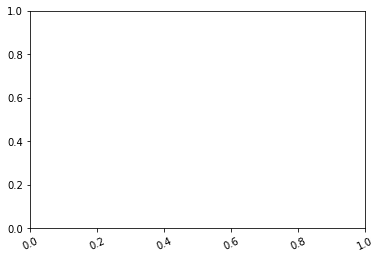

In [293]:
# Create a scatter plot of date vs rating, so you can see what the data looks like
plt.xticks(rotation=25)
# plt.plot(, 'b.', alpha=0.5)
# plt.plot( ,'r-', linewidth=3)
plt.show()